# Data 612 - Assignment 2 
### Michael D'Acampora

The goal of this assignment is to try out different ways of implementing and configuring a recommender, and to evaluate the different approaches. The first method will be to implement a rudimentary item-item based collaborative filtering algorithm. The algorithm would recommend the movies with the highest correlated ratings to the subject movie. 



## Method 1 - Item-Item Collaborative Filtering

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')


ModuleNotFoundError: No module named 'seaborn'

In [2]:
ratings = pd.read_csv('https://raw.githubusercontent.com/mjdacs/data612/master/project_2/ml-latest-small/ratings.csv')
movies = pd.read_csv('https://raw.githubusercontent.com/mjdacs/data612/master/project_2/ml-latest-small/movies.csv')
tags = pd.read_csv('https://raw.githubusercontent.com/mjdacs/data612/master/project_2/ml-latest-small/tags.csv')

In [3]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [4]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [5]:
tags.head()

,userId,movieId,tag,timestamp
0,2,60756,funny,1445714994
1,2,60756,Highly quotable,1445714996
2,2,60756,will ferrell,1445714992
3,2,89774,Boxing story,1445715207
4,2,89774,MMA,1445715200


In [6]:
# links.head()

In [7]:
print(ratings.shape, movies.shape, tags.shape)

(100836, 4) (9742, 3) (3683, 4)


In [8]:
df = pd.merge(ratings, movies, on='movieId')
df.head

<bound method NDFrame.head of         userId  movieId  rating   timestamp  \
0            1        1     4.0   964982703   
1            5        1     4.0   847434962   
2            7        1     4.5  1106635946   
3           15        1     2.5  1510577970   
4           17        1     4.5  1305696483   
5           18        1     3.5  1455209816   
6           19        1     4.0   965705637   
7           21        1     3.5  1407618878   
8           27        1     3.0   962685262   
9           31        1     5.0   850466616   
10          32        1     3.0   856736119   
11          33        1     3.0   939647444   
12          40        1     5.0   832058959   
13          43        1     5.0   848993983   
14          44        1     3.0   869251860   
15          45        1     4.0   951170182   
16          46        1     5.0   834787906   
17          50        1     3.0  1514238116   
18          54        1     3.0   830247330   
19          57        1     5.

In [9]:
df.describe()

,userId,movieId,rating,timestamp
count,100836.000000,100836.000000,100836.000000,1.008360e+05
mean,326.127564,19435.295718,3.501557,1.205946e+09
std,182.618491,35530.987199,1.042529,2.162610e+08
min,1.000000,1.000000,0.500000,8.281246e+08
25%,177.000000,1199.000000,3.000000,1.019124e+09
50%,325.000000,2991.000000,3.500000,1.186087e+09
75%,477.000000,8122.000000,4.000000,1.435994e+09
max,610.000000,193609.000000,5.000000,1.537799e+09


In [10]:
avg_ratings = pd.DataFrame(df.groupby('title')['rating'].mean())
avg_ratings.head()

,rating
title,
'71 (2014),4.0
'Hellboy': The Seeds of Creation (2004),4.0
'Round Midnight (1986),3.5
'Salem's Lot (2004),5.0
'Til There Was You (1997),4.0


In [11]:
avg_ratings['n_ratings']= df.groupby('title')['rating'].count()
avg_ratings.sort_values(by='n_ratings',ascending=False).head()

,rating,n_ratings
title,,
Forrest Gump (1994),4.164134,329
"Shawshank Redemption, The (1994)",4.429022,317
Pulp Fiction (1994),4.197068,307
"Silence of the Lambs, The (1991)",4.161290,279
"Matrix, The (1999)",4.192446,278


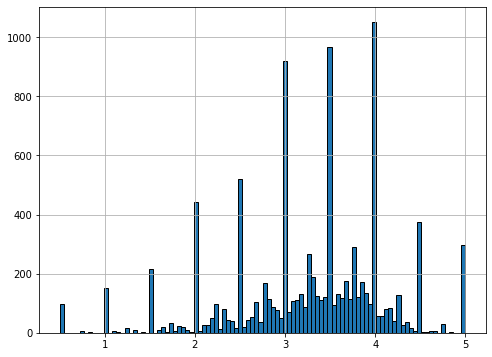

In [12]:
plt.figure(figsize=(8,6))
plt.rcParams['patch.force_edgecolor'] = True
avg_ratings['rating'].hist(bins=100)

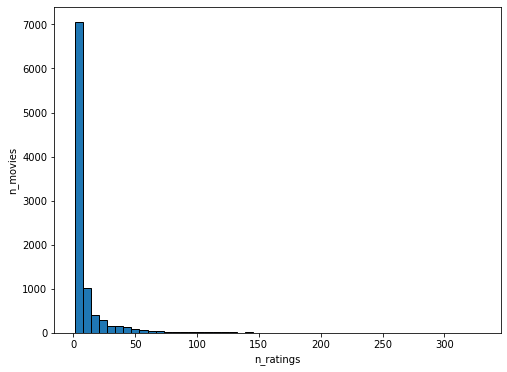

In [13]:
plt.figure(figsize=(8,6))
plt.rcParams['patch.force_edgecolor'] = True
plt.hist(avg_ratings['n_ratings'], bins=50)
# avg_ratings['n_ratings'].hist(bins=50)
plt.xlabel("n_ratings")
plt.ylabel("n_movies")
plt.show()

In [14]:
sns.jointplot(x='rating', y='n_ratings', data=avg_ratings, alpha=0.5)

NameError: name 'sns' is not defined

Now we have to create the user-item matrix which is a giant table of every movie in the database and the ratings of each by ever user. Naturally since each user will not rate anything close to every movie, we will have a very sparse matrix.

In [15]:
movie_matrix = df.pivot_table(index='userId', columns='title', values='rating')
movie_matrix.head()

title,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),'Tis the Season for Love (2015),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...,Zulu (2013),[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),anohana: The Flower We Saw That Day - The Movie (2013),eXistenZ (1999),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
userId,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
movie_matrix.shape

(610, 9719)

In [17]:
avg_ratings.head()

,rating,n_ratings
title,,
'71 (2014),4.0,1
'Hellboy': The Seeds of Creation (2004),4.0,1
'Round Midnight (1986),3.5,2
'Salem's Lot (2004),5.0,1
'Til There Was You (1997),4.0,2


In [18]:
avg_ratings.sort_values(by='n_ratings', ascending=False).head()

,rating,n_ratings
title,,
Forrest Gump (1994),4.164134,329
"Shawshank Redemption, The (1994)",4.429022,317
Pulp Fiction (1994),4.197068,307
"Silence of the Lambs, The (1991)",4.161290,279
"Matrix, The (1999)",4.192446,278


In [19]:
pulpfiction_user_rating = movie_matrix['Pulp Fiction (1994)']
pulpfiction_user_rating.head(25)


userId
1     3.0
2     NaN
3     NaN
4     1.0
5     5.0
6     2.0
7     NaN
8     4.0
9     NaN
10    1.0
11    NaN
12    NaN
13    NaN
14    3.0
15    4.0
16    3.0
17    5.0
18    4.0
19    NaN
20    NaN
21    3.5
22    NaN
23    3.5
24    4.0
25    NaN
Name: Pulp Fiction (1994), dtype: float64

In [20]:
thematrix_user_rating = movie_matrix['Matrix, The (1999)']
thematrix_user_rating.head(5)

userId
1    5.0
2    NaN
3    NaN
4    1.0
5    NaN
Name: Matrix, The (1999), dtype: float64

In [21]:
corr_w_pulpfiction = movie_matrix.corrwith(pulpfiction_user_rating)
corr_w_pulpfiction.head(10)

title
'71 (2014)                                      NaN
'Hellboy': The Seeds of Creation (2004)         NaN
'Round Midnight (1986)                          NaN
'Salem's Lot (2004)                             NaN
'Til There Was You (1997)                       NaN
'Tis the Season for Love (2015)                 NaN
'burbs, The (1989)                        -0.187323
'night Mother (1986)                            NaN
(500) Days of Summer (2009)               -0.044034
*batteries not included (1987)            -0.738549
dtype: float64

In [22]:
corr_w_thematrix = movie_matrix.corrwith(thematrix_user_rating)
corr_w_thematrix.head(10)

title
'71 (2014)                                      NaN
'Hellboy': The Seeds of Creation (2004)         NaN
'Round Midnight (1986)                          NaN
'Salem's Lot (2004)                             NaN
'Til There Was You (1997)                       NaN
'Tis the Season for Love (2015)                 NaN
'burbs, The (1989)                        -0.160843
'night Mother (1986)                            NaN
(500) Days of Summer (2009)                0.302316
*batteries not included (1987)             0.392232
dtype: float64

In [23]:
corr_w_pulpfiction = pd.DataFrame(corr_w_pulpfiction, columns=['Correlation'])
corr_w_pulpfiction.dropna(inplace=True)
corr_w_pulpfiction.head()

,Correlation
title,
"'burbs, The (1989)",-0.187323
(500) Days of Summer (2009),-0.044034
*batteries not included (1987),-0.738549
...And Justice for All (1979),-0.188982
10 Cent Pistol (2015),1.000000


In [24]:
corr_w_thematrix = pd.DataFrame(corr_w_thematrix, columns=['Correlation'])
corr_w_thematrix.dropna(inplace=True)
corr_w_thematrix.head()

,Correlation
title,
"'burbs, The (1989)",-0.160843
(500) Days of Summer (2009),0.302316
*batteries not included (1987),0.392232
...And Justice for All (1979),0.654654
10 Cent Pistol (2015),-1.000000


In [25]:
corr_w_pulpfiction = corr_w_pulpfiction.join(avg_ratings['n_ratings'])
corr_w_thematrix = corr_w_thematrix.join(avg_ratings['n_ratings'])

In [26]:
corr_w_pulpfiction.head()

,Correlation,n_ratings
title,,
"'burbs, The (1989)",-0.187323,17
(500) Days of Summer (2009),-0.044034,42
*batteries not included (1987),-0.738549,7
...And Justice for All (1979),-0.188982,3
10 Cent Pistol (2015),1.000000,2


In [27]:
corr_w_thematrix.head()

,Correlation,n_ratings
title,,
"'burbs, The (1989)",-0.160843,17
(500) Days of Summer (2009),0.302316,42
*batteries not included (1987),0.392232,7
...And Justice for All (1979),0.654654,3
10 Cent Pistol (2015),-1.000000,2


In [28]:
corr_w_pulpfiction[corr_w_pulpfiction['n_ratings'] > 100].sort_values(by='Correlation', ascending=False).head(10)

,Correlation,n_ratings
title,,
Pulp Fiction (1994),1.000000,307
Fight Club (1999),0.543465,218
Kill Bill: Vol. 1 (2003),0.504147,131
Trainspotting (1996),0.437714,102
Kill Bill: Vol. 2 (2004),0.421685,110
"Usual Suspects, The (1995)",0.411700,204
"Amelie (Fabuleux destin d'Amélie Poulain, Le) (2001)",0.402193,120
Eternal Sunshine of the Spotless Mind (2004),0.401534,131
Reservoir Dogs (1992),0.394687,131


In [29]:
corr_w_thematrix[corr_w_thematrix['n_ratings'] > 100].sort_values(by='Correlation', ascending=False).head(10)

,Correlation,n_ratings
title,,
"Matrix, The (1999)",1.000000,278
Die Hard (1988),0.544466,145
Inception (2010),0.514767,143
Braveheart (1995),0.496045,237
Aliens (1986),0.470865,126
"Lion King, The (1994)",0.444932,172
"Monsters, Inc. (2001)",0.441205,132
Batman Begins (2005),0.440338,116
Jurassic Park (1993),0.427936,238


### Final words on Memory-based approach: **TODO**
As no training or optimization is involved, it is an easy to use approach. But its performance decreases when we have sparse data which hinders scalability of this approach for most of the real-world problems.

## Method 2 - Model based approach

Matrix factorization is used to extract attitudes or preferences from a small number of hidden factors. Other word is _Embeddings_

In [31]:
from surprise import Reader, Dataset


ModuleNotFoundError: No module named 'surprise'